In [1]:
import os
import numpy as np
import pickle

from keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from models.AED import Autoencoder

Using TensorFlow backend.


In [2]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'boson/'
RUN_FOLDER = '../run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
print(RUN_FOLDER)

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

../run/vae/0001_boson/


In [3]:
data_file = '../data/data.sav'

with open(data_file, "rb") as f:
    X, Y = pickle.load(f)
    
X = np.asarray(X)
Y = np.asarray(Y)

split = round(len(X)*.85)

x_train = X[:split]
y_train = Y[:split]

x_test  = X[split:]
y_test  = Y[split:]


In [4]:
AE = Autoencoder(
    input_dim = (x_train.shape[1],)
    , encoder_dense_layers = [64,64,128]
    , decoder_dense_layers = [64,64, 35]
    , z_dim = 10
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [5]:
AE.encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 25)                0         
_________________________________________________________________
encoder_dense_0 (Dense)      (None, 64)                1664      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)               0   

In [6]:
AE.decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 128)               0         
_________________________________________________________________
decoder_dense_t_0 (Dense)    (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
decoder_dense_t_1 (Dense)    (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64)                0   

In [7]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

AE.compile(LEARNING_RATE)

In [52]:
AE.train(     
    x_train, y_train
    , batch_size = BATCH_SIZE
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

AE.save(RUN_FOLDER)

Epoch 1/2000
3400/3400 [==============================] - 0s 86us/step - loss: 0.0349

Epoch 00001: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 2/2000
3400/3400 [==============================] - 0s 41us/step - loss: 0.0027

Epoch 00002: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 3/2000
3400/3400 [==============================] - 0s 43us/step - loss: 0.0022

Epoch 00003: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 4/2000
3400/3400 [==============================] - 0s 42us/step - loss: 0.0020

Epoch 00004: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 5/2000
3400/3400 [==============================] - 0s 43us/step - loss: 0.0020

Epoch 00005: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 6/2000
3400/3400 [==============================] - 0s 41us/step - loss: 0.0020

Epoch 00006: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 7/2000
3400/3400 [==============================] - 

3400/3400 [==============================] - 0s 38us/step - loss: 7.9647e-04

Epoch 00053: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 54/2000
3400/3400 [==============================] - 0s 38us/step - loss: 7.7957e-04

Epoch 00054: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 55/2000
3400/3400 [==============================] - 0s 36us/step - loss: 7.6400e-04

Epoch 00055: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 56/2000
3400/3400 [==============================] - 0s 42us/step - loss: 7.6048e-04

Epoch 00056: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 57/2000
3400/3400 [==============================] - 0s 38us/step - loss: 7.3634e-04

Epoch 00057: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 58/2000
3400/3400 [==============================] - 0s 38us/step - loss: 7.2453e-04

Epoch 00058: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 59/2000
3400/3400 [=================

3400/3400 [==============================] - 0s 69us/step - loss: 4.2330e-04

Epoch 00104: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 105/2000
3400/3400 [==============================] - 0s 67us/step - loss: 4.1606e-04

Epoch 00105: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 106/2000
3400/3400 [==============================] - 0s 76us/step - loss: 4.1321e-04

Epoch 00106: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 107/2000
3400/3400 [==============================] - 0s 67us/step - loss: 4.1450e-04

Epoch 00107: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 108/2000
3400/3400 [==============================] - 0s 94us/step - loss: 4.0782e-04

Epoch 00108: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 109/2000
3400/3400 [==============================] - 0s 66us/step - loss: 3.9976e-04

Epoch 00109: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 110/2000
3400/3400 [===========

3400/3400 [==============================] - 0s 116us/step - loss: 2.3774e-04

Epoch 00204: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 205/2000
3400/3400 [==============================] - 0s 117us/step - loss: 2.3508e-04

Epoch 00205: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 206/2000
3400/3400 [==============================] - 0s 115us/step - loss: 2.4059e-04

Epoch 00206: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 207/2000
3400/3400 [==============================] - 0s 107us/step - loss: 2.3962e-04

Epoch 00207: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 208/2000
3400/3400 [==============================] - 0s 88us/step - loss: 2.3312e-04

Epoch 00208: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 209/2000
3400/3400 [==============================] - 0s 84us/step - loss: 2.3268e-04

Epoch 00209: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 210/2000
3400/3400 [=======

3400/3400 [==============================] - 0s 44us/step - loss: 1.8258e-04

Epoch 00304: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 305/2000
3400/3400 [==============================] - 0s 43us/step - loss: 1.8230e-04

Epoch 00305: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 306/2000
3400/3400 [==============================] - 0s 47us/step - loss: 1.8147e-04

Epoch 00306: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 307/2000
3400/3400 [==============================] - 0s 43us/step - loss: 1.8046e-04

Epoch 00307: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 308/2000
3400/3400 [==============================] - 0s 43us/step - loss: 1.8153e-04

Epoch 00308: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 309/2000
3400/3400 [==============================] - 0s 44us/step - loss: 1.7737e-04

Epoch 00309: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 310/2000
3400/3400 [===========

3400/3400 [==============================] - 0s 40us/step - loss: 1.5633e-04

Epoch 00404: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 405/2000
3400/3400 [==============================] - 0s 39us/step - loss: 1.5296e-04

Epoch 00405: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 406/2000
3400/3400 [==============================] - 0s 40us/step - loss: 1.6097e-04

Epoch 00406: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 407/2000
3400/3400 [==============================] - 0s 40us/step - loss: 1.5327e-04

Epoch 00407: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 408/2000
3400/3400 [==============================] - 0s 40us/step - loss: 1.5336e-04

Epoch 00408: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 409/2000
3400/3400 [==============================] - 0s 44us/step - loss: 1.5381e-04

Epoch 00409: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 410/2000
3400/3400 [===========

3400/3400 [==============================] - 0s 119us/step - loss: 1.4192e-04

Epoch 00504: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 505/2000
3400/3400 [==============================] - 1s 169us/step - loss: 1.3650e-04

Epoch 00505: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 506/2000
3400/3400 [==============================] - 1s 167us/step - loss: 1.3478e-04

Epoch 00506: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 507/2000
3400/3400 [==============================] - 1s 183us/step - loss: 1.4121e-04

Epoch 00507: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 508/2000
3400/3400 [==============================] - 1s 170us/step - loss: 1.3549e-04

Epoch 00508: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 509/2000
3400/3400 [==============================] - 1s 172us/step - loss: 1.4070e-04

Epoch 00509: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 510/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 46us/step - loss: 1.2546e-04

Epoch 00604: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 605/2000
3400/3400 [==============================] - 0s 45us/step - loss: 1.2192e-04

Epoch 00605: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 606/2000
3400/3400 [==============================] - 0s 54us/step - loss: 1.2485e-04

Epoch 00606: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 607/2000
3400/3400 [==============================] - 0s 50us/step - loss: 1.3342e-04

Epoch 00607: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 608/2000
3400/3400 [==============================] - 0s 50us/step - loss: 1.2239e-04

Epoch 00608: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 609/2000
3400/3400 [==============================] - 0s 45us/step - loss: 1.2123e-04

Epoch 00609: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 610/2000
3400/3400 [===========

3400/3400 [==============================] - 0s 44us/step - loss: 1.1578e-04

Epoch 00704: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 705/2000
3400/3400 [==============================] - 0s 45us/step - loss: 1.1570e-04

Epoch 00705: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 706/2000
3400/3400 [==============================] - 0s 48us/step - loss: 1.1856e-04

Epoch 00706: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 707/2000
3400/3400 [==============================] - 0s 44us/step - loss: 1.1474e-04

Epoch 00707: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 708/2000
3400/3400 [==============================] - 0s 44us/step - loss: 1.0972e-04

Epoch 00708: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 709/2000
3400/3400 [==============================] - 0s 45us/step - loss: 1.1870e-04

Epoch 00709: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 710/2000
3400/3400 [===========

3400/3400 [==============================] - 0s 48us/step - loss: 1.0802e-04

Epoch 00804: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 805/2000
3400/3400 [==============================] - 0s 44us/step - loss: 1.0885e-04

Epoch 00805: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 806/2000
3400/3400 [==============================] - 0s 44us/step - loss: 1.0508e-04

Epoch 00806: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 807/2000
3400/3400 [==============================] - 0s 45us/step - loss: 1.0612e-04

Epoch 00807: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 808/2000
3400/3400 [==============================] - 0s 46us/step - loss: 1.0627e-04

Epoch 00808: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 809/2000
3400/3400 [==============================] - 0s 47us/step - loss: 1.0727e-04

Epoch 00809: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 810/2000
3400/3400 [===========

3400/3400 [==============================] - 0s 87us/step - loss: 1.0063e-04

Epoch 00904: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 905/2000
3400/3400 [==============================] - 0s 75us/step - loss: 1.0025e-04

Epoch 00905: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 906/2000
3400/3400 [==============================] - 0s 81us/step - loss: 9.8632e-05

Epoch 00906: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 907/2000
3400/3400 [==============================] - 0s 87us/step - loss: 9.7075e-05

Epoch 00907: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 908/2000
3400/3400 [==============================] - 0s 71us/step - loss: 1.0303e-04

Epoch 00908: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 909/2000
3400/3400 [==============================] - 0s 85us/step - loss: 1.0739e-04

Epoch 00909: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 910/2000
3400/3400 [===========

3400/3400 [==============================] - 0s 59us/step - loss: 9.6580e-05

Epoch 01004: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1005/2000
3400/3400 [==============================] - 0s 61us/step - loss: 1.0132e-04

Epoch 01005: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1006/2000
3400/3400 [==============================] - 0s 57us/step - loss: 9.2926e-05

Epoch 01006: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1007/2000
3400/3400 [==============================] - 0s 51us/step - loss: 9.2030e-05

Epoch 01007: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1008/2000
3400/3400 [==============================] - 0s 51us/step - loss: 9.0856e-05

Epoch 01008: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1009/2000
3400/3400 [==============================] - 0s 53us/step - loss: 1.0039e-04

Epoch 01009: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1010/2000
3400/3400 [=====

Epoch 1054/2000
3400/3400 [==============================] - 1s 207us/step - loss: 9.1228e-05

Epoch 01054: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1055/2000
3400/3400 [==============================] - 1s 234us/step - loss: 9.1068e-05

Epoch 01055: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1056/2000
3400/3400 [==============================] - 1s 238us/step - loss: 9.2277e-05

Epoch 01056: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1057/2000
3400/3400 [==============================] - 1s 241us/step - loss: 9.4169e-05

Epoch 01057: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1058/2000
3400/3400 [==============================] - 1s 226us/step - loss: 9.5844e-05

Epoch 01058: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1059/2000
3400/3400 [==============================] - 1s 224us/step - loss: 8.8922e-05

Epoch 01059: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1060

Epoch 1104/2000
3400/3400 [==============================] - 0s 57us/step - loss: 9.1364e-05

Epoch 01104: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1105/2000
3400/3400 [==============================] - 0s 49us/step - loss: 9.0078e-05

Epoch 01105: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1106/2000
3400/3400 [==============================] - 0s 48us/step - loss: 9.1443e-05

Epoch 01106: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1107/2000
3400/3400 [==============================] - 0s 47us/step - loss: 8.9901e-05

Epoch 01107: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1108/2000
3400/3400 [==============================] - 0s 50us/step - loss: 9.0516e-05

Epoch 01108: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1109/2000
3400/3400 [==============================] - 0s 52us/step - loss: 8.9783e-05

Epoch 01109: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1110/2000


3400/3400 [==============================] - 0s 53us/step - loss: 8.9181e-05

Epoch 01154: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1155/2000
3400/3400 [==============================] - 0s 51us/step - loss: 8.6221e-05

Epoch 01155: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1156/2000
3400/3400 [==============================] - 0s 53us/step - loss: 8.4906e-05

Epoch 01156: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1157/2000
3400/3400 [==============================] - 0s 52us/step - loss: 8.9086e-05

Epoch 01157: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1158/2000
3400/3400 [==============================] - 0s 52us/step - loss: 9.3552e-05

Epoch 01158: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1159/2000
3400/3400 [==============================] - 0s 52us/step - loss: 9.2450e-05

Epoch 01159: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1160/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 57us/step - loss: 8.9187e-05

Epoch 01204: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1205/2000
3400/3400 [==============================] - 0s 56us/step - loss: 9.1017e-05

Epoch 01205: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1206/2000
3400/3400 [==============================] - 0s 58us/step - loss: 8.5409e-05

Epoch 01206: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1207/2000
3400/3400 [==============================] - 0s 65us/step - loss: 8.4826e-05

Epoch 01207: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1208/2000
3400/3400 [==============================] - 0s 66us/step - loss: 8.8141e-05

Epoch 01208: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1209/2000
3400/3400 [==============================] - 0s 77us/step - loss: 8.3837e-05

Epoch 01209: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1210/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 56us/step - loss: 8.4639e-05

Epoch 01254: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1255/2000
3400/3400 [==============================] - 0s 53us/step - loss: 8.4010e-05

Epoch 01255: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1256/2000
3400/3400 [==============================] - 0s 53us/step - loss: 8.4670e-05

Epoch 01256: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1257/2000
3400/3400 [==============================] - 0s 54us/step - loss: 8.3993e-05

Epoch 01257: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1258/2000
3400/3400 [==============================] - 0s 56us/step - loss: 8.7562e-05

Epoch 01258: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1259/2000
3400/3400 [==============================] - 0s 55us/step - loss: 8.1781e-05

Epoch 01259: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1260/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 50us/step - loss: 8.1871e-05

Epoch 01304: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1305/2000
3400/3400 [==============================] - 0s 47us/step - loss: 8.8565e-05

Epoch 01305: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1306/2000
3400/3400 [==============================] - 0s 46us/step - loss: 8.5689e-05

Epoch 01306: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1307/2000
3400/3400 [==============================] - 0s 53us/step - loss: 8.2719e-05

Epoch 01307: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1308/2000
3400/3400 [==============================] - 0s 57us/step - loss: 8.5070e-05

Epoch 01308: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1309/2000
3400/3400 [==============================] - 0s 51us/step - loss: 8.0546e-05

Epoch 01309: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1310/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 51us/step - loss: 8.2412e-05

Epoch 01354: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1355/2000
3400/3400 [==============================] - 0s 48us/step - loss: 8.0623e-05

Epoch 01355: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1356/2000
3400/3400 [==============================] - 0s 56us/step - loss: 8.1404e-05

Epoch 01356: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1357/2000
3400/3400 [==============================] - 0s 54us/step - loss: 8.2187e-05

Epoch 01357: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1358/2000
3400/3400 [==============================] - 0s 53us/step - loss: 8.0661e-05

Epoch 01358: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1359/2000
3400/3400 [==============================] - 0s 56us/step - loss: 8.1237e-05

Epoch 01359: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1360/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 61us/step - loss: 8.5383e-05

Epoch 01404: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1405/2000
3400/3400 [==============================] - 0s 63us/step - loss: 7.9070e-05

Epoch 01405: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1406/2000
3400/3400 [==============================] - 0s 64us/step - loss: 7.7598e-05

Epoch 01406: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1407/2000
3400/3400 [==============================] - 0s 56us/step - loss: 8.0972e-05

Epoch 01407: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1408/2000
3400/3400 [==============================] - 0s 63us/step - loss: 8.4623e-05

Epoch 01408: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1409/2000
3400/3400 [==============================] - 0s 70us/step - loss: 7.7356e-05

Epoch 01409: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1410/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 66us/step - loss: 8.1648e-05

Epoch 01454: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1455/2000
3400/3400 [==============================] - 0s 65us/step - loss: 8.0656e-05

Epoch 01455: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1456/2000
3400/3400 [==============================] - 0s 67us/step - loss: 7.8735e-05

Epoch 01456: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1457/2000
3400/3400 [==============================] - 0s 49us/step - loss: 7.6017e-05

Epoch 01457: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1458/2000
3400/3400 [==============================] - 0s 50us/step - loss: 8.2123e-05

Epoch 01458: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1459/2000
3400/3400 [==============================] - 0s 59us/step - loss: 7.8687e-05

Epoch 01459: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1460/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 45us/step - loss: 7.7798e-05

Epoch 01504: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1505/2000
3400/3400 [==============================] - 0s 43us/step - loss: 7.4882e-05

Epoch 01505: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1506/2000
3400/3400 [==============================] - 0s 47us/step - loss: 7.5196e-05

Epoch 01506: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1507/2000
3400/3400 [==============================] - 0s 43us/step - loss: 7.8672e-05

Epoch 01507: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1508/2000
3400/3400 [==============================] - 0s 48us/step - loss: 7.9960e-05

Epoch 01508: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1509/2000
3400/3400 [==============================] - 0s 53us/step - loss: 8.1017e-05

Epoch 01509: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1510/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 84us/step - loss: 7.4444e-05

Epoch 01554: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1555/2000
3400/3400 [==============================] - 0s 65us/step - loss: 7.5242e-05

Epoch 01555: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1556/2000
3400/3400 [==============================] - 0s 59us/step - loss: 7.5358e-05

Epoch 01556: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1557/2000
3400/3400 [==============================] - 0s 48us/step - loss: 8.2782e-05

Epoch 01557: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1558/2000
3400/3400 [==============================] - 0s 47us/step - loss: 7.9320e-05

Epoch 01558: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1559/2000
3400/3400 [==============================] - 0s 44us/step - loss: 7.6553e-05

Epoch 01559: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1560/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 54us/step - loss: 7.5708e-05

Epoch 01604: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1605/2000
3400/3400 [==============================] - 0s 59us/step - loss: 9.5918e-05

Epoch 01605: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1606/2000
3400/3400 [==============================] - 0s 66us/step - loss: 9.2977e-05

Epoch 01606: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1607/2000
3400/3400 [==============================] - 0s 55us/step - loss: 7.6414e-05

Epoch 01607: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1608/2000
3400/3400 [==============================] - 0s 52us/step - loss: 7.4844e-05

Epoch 01608: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1609/2000
3400/3400 [==============================] - 0s 54us/step - loss: 8.1364e-05

Epoch 01609: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1610/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 60us/step - loss: 7.5757e-05

Epoch 01654: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1655/2000
3400/3400 [==============================] - 0s 60us/step - loss: 7.7360e-05

Epoch 01655: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1656/2000
3400/3400 [==============================] - 0s 71us/step - loss: 7.3982e-05

Epoch 01656: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1657/2000
3400/3400 [==============================] - 0s 60us/step - loss: 7.3585e-05

Epoch 01657: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1658/2000
3400/3400 [==============================] - 0s 78us/step - loss: 7.3237e-05

Epoch 01658: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1659/2000
3400/3400 [==============================] - 0s 55us/step - loss: 7.2977e-05

Epoch 01659: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1660/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 53us/step - loss: 7.3105e-05

Epoch 01704: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1705/2000
3400/3400 [==============================] - 0s 59us/step - loss: 7.5506e-05

Epoch 01705: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1706/2000
3400/3400 [==============================] - 0s 61us/step - loss: 7.3484e-05

Epoch 01706: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1707/2000
3400/3400 [==============================] - 0s 64us/step - loss: 7.2944e-05

Epoch 01707: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1708/2000
3400/3400 [==============================] - 0s 59us/step - loss: 7.5060e-05

Epoch 01708: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1709/2000
3400/3400 [==============================] - 0s 57us/step - loss: 7.5930e-05

Epoch 01709: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1710/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 69us/step - loss: 7.2373e-05

Epoch 01754: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1755/2000
3400/3400 [==============================] - 0s 72us/step - loss: 7.3113e-05

Epoch 01755: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1756/2000
3400/3400 [==============================] - 0s 74us/step - loss: 7.5718e-05

Epoch 01756: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1757/2000
3400/3400 [==============================] - 0s 81us/step - loss: 7.5274e-05

Epoch 01757: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1758/2000
3400/3400 [==============================] - 0s 82us/step - loss: 7.2766e-05

Epoch 01758: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1759/2000
3400/3400 [==============================] - 0s 66us/step - loss: 7.7380e-05

Epoch 01759: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1760/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 55us/step - loss: 7.1435e-05

Epoch 01804: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1805/2000
3400/3400 [==============================] - 0s 53us/step - loss: 6.9223e-05

Epoch 01805: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1806/2000
3400/3400 [==============================] - 0s 50us/step - loss: 7.0863e-05

Epoch 01806: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1807/2000
3400/3400 [==============================] - 0s 50us/step - loss: 7.2495e-05

Epoch 01807: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1808/2000
3400/3400 [==============================] - 0s 49us/step - loss: 7.1771e-05

Epoch 01808: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1809/2000
3400/3400 [==============================] - 0s 50us/step - loss: 7.2176e-05

Epoch 01809: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1810/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 50us/step - loss: 6.8613e-05

Epoch 01854: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1855/2000
3400/3400 [==============================] - 0s 51us/step - loss: 6.9116e-05

Epoch 01855: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1856/2000
3400/3400 [==============================] - 0s 52us/step - loss: 7.0091e-05

Epoch 01856: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1857/2000
3400/3400 [==============================] - 0s 51us/step - loss: 7.1370e-05

Epoch 01857: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1858/2000
3400/3400 [==============================] - 0s 50us/step - loss: 7.8248e-05

Epoch 01858: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1859/2000
3400/3400 [==============================] - 0s 51us/step - loss: 6.9700e-05

Epoch 01859: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1860/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 52us/step - loss: 7.4300e-05

Epoch 01904: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1905/2000
3400/3400 [==============================] - 0s 50us/step - loss: 7.0184e-05

Epoch 01905: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1906/2000
3400/3400 [==============================] - 0s 51us/step - loss: 6.8287e-05

Epoch 01906: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1907/2000
3400/3400 [==============================] - 0s 47us/step - loss: 7.1342e-05

Epoch 01907: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1908/2000
3400/3400 [==============================] - 0s 47us/step - loss: 7.0234e-05

Epoch 01908: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1909/2000
3400/3400 [==============================] - 0s 47us/step - loss: 7.0457e-05

Epoch 01909: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1910/2000
3400/3400 [=====

3400/3400 [==============================] - 0s 50us/step - loss: 6.9536e-05

Epoch 01954: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1955/2000
3400/3400 [==============================] - 0s 47us/step - loss: 6.6603e-05

Epoch 01955: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1956/2000
3400/3400 [==============================] - 0s 48us/step - loss: 7.1972e-05

Epoch 01956: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1957/2000
3400/3400 [==============================] - 0s 47us/step - loss: 6.6873e-05

Epoch 01957: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1958/2000
3400/3400 [==============================] - 0s 49us/step - loss: 7.0588e-05

Epoch 01958: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1959/2000
3400/3400 [==============================] - 0s 46us/step - loss: 6.8427e-05

Epoch 01959: saving model to ../run/vae/0001_boson/weights/weights.h5
Epoch 1960/2000
3400/3400 [=====

In [53]:
def load_model(model_class, folder):
    
    with open(os.path.join(folder, 'params.pkl'), 'rb') as f:
        params = pickle.load(f)

    model = model_class(*params)
    model.load_weights(os.path.join(folder, 'weights/weights.h5'))

    return model

In [54]:
AE2 = load_model(Autoencoder, RUN_FOLDER)

In [55]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_test   = y_test[example_idx]

z_points = AE2.encoder.predict(example_images)
print('z_points: ', z_points)
reconst_images = AE.decoder.predict(z_points)
print('reconstituted: {}'.format(reconst_images))

z_points:  [[ 8.0807424e-01  3.7639779e-01 -9.5976281e-01  1.8505597e-01
   9.3133634e-01  4.4550472e-01 -6.3308793e-01  1.2674568e+00
  -1.2964523e+00  1.4917305e+00]
 [-1.2670541e+00 -2.3509769e+00 -1.0251720e+00  2.0511353e-01
   9.9640727e-02  5.2551655e-03 -5.5544883e-01  8.9469022e-01
  -6.4997965e-01  6.5147007e-01]
 [-1.8007241e-02 -7.3298603e-01  1.5241075e-01  8.8336694e-01
  -2.8826460e-01  1.1236528e-01  9.9601161e-01 -7.2265553e-01
   7.8737152e-01 -1.7011192e+00]
 [ 2.2838853e-02 -8.4789425e-01 -8.5962713e-01 -6.4773923e-01
   5.4059786e-01  1.3532766e+00 -9.1945469e-01  5.7093787e-01
  -9.2891198e-01  7.9204071e-01]
 [ 1.3792208e-01 -4.2324370e-01 -1.6496410e+00 -1.5570658e+00
  -1.2296708e+00 -4.2503801e-01  1.5914892e-01  9.6880656e-01
   5.9670728e-01  1.6011534e+00]
 [ 7.6841682e-02 -1.5974678e+00  6.7104125e-01  3.5044369e-01
   8.3427072e-01 -1.2506883e-01 -4.1627371e-01 -8.3150440e-01
  -8.9443499e-01  6.0892880e-01]
 [-5.4754770e-01 -1.3151079e+00 -1.5338578e+00 

In [56]:
print(z_points[0])

[ 0.80807424  0.3763978  -0.9597628   0.18505597  0.93133634  0.44550472
 -0.63308793  1.2674568  -1.2964523   1.4917305 ]


In [57]:
print(reconst_images[1])

[0.00026867 0.00117895 0.0017944  0.00072122 0.00210804 0.00357234
 0.0039854  0.00343722 0.00499341 0.00092986 0.01895708 0.03244507
 0.01229611 0.03673676 0.02929372 0.00977945 0.05726761 0.02330491
 0.01035696 0.12049094 0.01027206 0.01874468 0.00982031 0.02302873
 0.01505828 0.00746503 0.01908159 0.00923294 0.0032829  0.0306035
 0.16018346 0.08514962 0.01348662 0.10144058 0.01270604]


In [58]:
print(sum(reconst_images[1]))

0.8934744596481323


Text(0.5, 1.0, 'VAE')

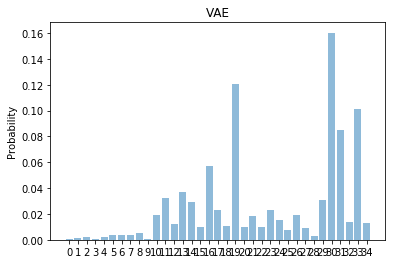

In [59]:
y_pos = np.arange(len(reconst_images[1]))

objects = list(range(len(reconst_images[1])))

plt.bar(y_pos, reconst_images[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('VAE')

Text(0.5, 1.0, 'Actual')

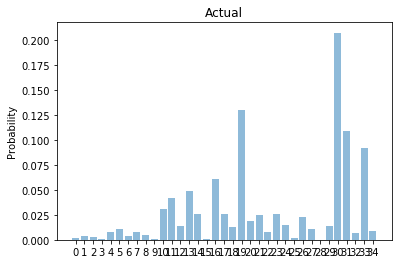

In [60]:
y_pos = np.arange(len(reconst_images[1]))

objects = list(range(len(reconst_images[1])))

plt.bar(y_pos, example_test[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('Actual')

In [42]:
y_test

array([[4.23572247e-08, 2.41180652e-05, 2.58120819e-03, ...,
        8.86679856e-02, 4.32124210e-02, 1.12131722e-01],
       [6.82488121e-09, 9.51530595e-06, 2.72418618e-03, ...,
        3.00766188e-02, 4.07118203e-02, 1.04692042e-01],
       [1.32508009e-04, 3.16016820e-03, 2.38207480e-02, ...,
        9.38891430e-02, 3.73499649e-03, 1.10064588e-01],
       ...,
       [2.45019070e-08, 2.52443812e-05, 4.27500454e-03, ...,
        1.41432926e-02, 1.96084559e-02, 3.95274824e-02],
       [7.21973165e-05, 4.51646662e-03, 5.46103728e-02, ...,
        2.76446732e-02, 4.99007790e-03, 8.50360749e-02],
       [1.29970971e-05, 2.47423324e-04, 1.20711103e-03, ...,
        3.28383442e-03, 3.91871041e-02, 1.31576409e-03]])